In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
intlines = []
with open('arch/data/intron.txt', 'r') as fp:
    for line in fp.readlines():
        line = line.rstrip()
        intlines.append(line)

In [24]:
m = 50
maxlen = 200

intsizes = []
for size in intlines:
    intsizes.append(len(size))

intbins = [0 for x in range(max(intsizes))]

for i in range(len(intsizes)):
    intbins[intsizes[i]-1] += 1

In [25]:
m2 = int((m/2) + 0.5 - 1)
count = 0
smoodata = []
for i in range(len(intbins)):
    inx = i-m2
    if inx < 0:
        inx = 0
    bef = intbins[inx:i]
    now = intbins[i]
    aft = intbins[i+1:i+m2+1]
    nowx = now * (m2 + 1)
    tbefx = 0
    cbefx = 0
    for j in range(len(bef)):
        coefb = m2 - 1 + j
        befx = bef[j] * coefb
        tbefx += befx
        cbefx += coefb
    taftx = 0
    caftx = 0
    for k in range(len(aft)):
        coefa = m2 - k
        aftx = aft[k] * coefa
        taftx += aftx
        caftx += coefa
    total_coef = (m2 + 1) + cbefx + caftx
    total = nowx + tbefx + taftx
    smoopt = total/total_coef
    count += 1
    if count <= maxlen:
        smoodata.append(smoopt)

In [26]:
df = pd.DataFrame(smoodata)
df.insert(1, 'length', [x for x in range(len(smoodata))])
df2 = df.rename(columns={0: 'counts'})
df2

,counts,length
0,0.000000,0
1,0.000000,1
2,0.000000,2
3,0.000000,3
4,0.000000,4
...,...,...
195,7.052905,195
196,7.058109,196
197,7.192541,197
198,7.246314,198


In [27]:
df3 = pd.DataFrame(intbins[:maxlen])
df3.insert(1, 'length', [x for x in range(len(smoodata))])
df4 = df3.rename(columns={0: 'counts'})
df4

,counts,length
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
195,7,195
196,9,196
197,6,197
198,5,198


<Axes: xlabel='length'>

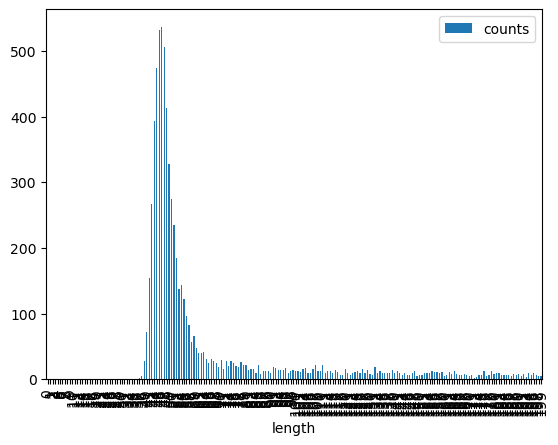

In [28]:
df4.plot.bar(x='length', y='counts')

<Axes: xlabel='length'>

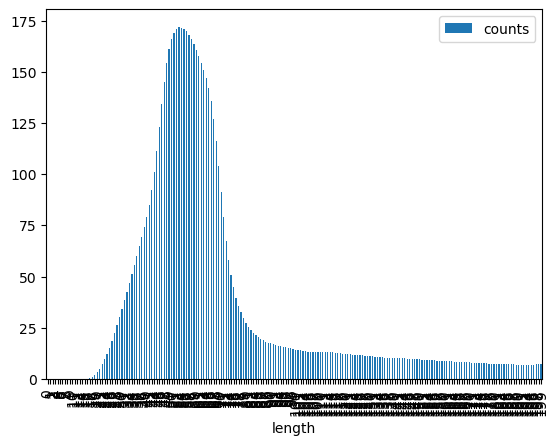

In [29]:
df2.plot.bar(x='length', y='counts')